# EXPLORATORY DATA ANALYSIS

1. Importing the necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import collections
import os
import cv2
import random
import math
from xml.etree import ElementTree
%matplotlib inline

In [2]:
base_path = 'Dataset/'

classes = ["D00", "D10", "D20", "D40"]

countries = ["Czech", "India", "Japan"]

In [3]:
anot_files = []            #storing all annotation file directories    
image_files = []           #storing all image files directories 
for country in countries:
    anot_files.extend([base_path + country + '/annotations/xmls/'+ filename for filename in os.listdir(base_path + country + '/annotations/xmls')])
    image_files.extend([base_path + country + '/images/'+ filename for filename in os.listdir(base_path + country + '/images')])

print(f'Total images in dataset: {len(image_files)}')

Total images in dataset: 21041


In [4]:
# the number of total images and total labels.
cls_names = []
l_images = 0

for i in anot_files:
    
    infile_xml = open(i)
    tree = ElementTree.parse(infile_xml)
    root = tree.getroot()
    if root.find('object'):
        for obj in root.iter('object'):
            cls_name = obj.find('name').text
            if cls_name in ['D00', 'D10', 'D20', 'D40']:
                cls_names.append(cls_name)
        
        l_images += 1

print(f"number of images with atleast 1 label：{l_images}")
print(f"number of labels：{len(cls_names)}")

C:\Users\admin\AppData\Local\Temp\ipykernel_8252\1102522635.py:10: DeprecationWarning: Testing an element's truth value will always return True in future versions.  Use specific 'len(elem)' or 'elem is not None' test instead.
  if root.find('object'):


number of images with atleast 1 label：14569
number of labels：25046


Count for each classes
D00 : 6592
D10 : 4446
D20 : 8381
D40 : 5627


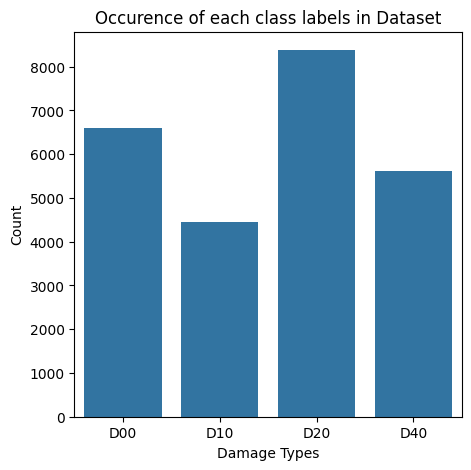

In [6]:
#number of each class labels
count_dict = collections.Counter(cls_names)
cls_count = []

print('Count for each classes')
for c in classes:
    cls_count.append(count_dict[c])
    print(f'{c} : {count_dict[c]}')
    
fig = plt.figure(figsize = (5, 5)) 
sns.barplot(x = classes, y = cls_count)  
plt.xlabel("Damage Types") 
plt.ylabel("Count") 
plt.title("Occurence of each class labels in Dataset") 
plt.show() 

In [7]:
count = []
cont = []
category = []   #counting total # images, D00, D10, D20, D40, # of labels

for country in countries:
    cont.extend([country]*6)
    category.extend(['# of images', 'D00', 'D10', 'D20', 'D40', '# of labels'])
    
    files = [filename for filename in os.listdir(base_path + country + '/annotations/xmls')]
    count.append(len(files))
    label_counts = [0,0,0,0]
    for i in files:
        infile_xml = open(base_path + country + '/annotations/xmls/' +i)
        tree = ElementTree.parse(infile_xml)
        root = tree.getroot()
        if root.find('object'):
            for obj in root.iter('object'):
                cls_name = obj.find('name').text
                if cls_name == 'D00':
                    label_counts[0] += 1
                elif cls_name == 'D10':
                    label_counts[1] += 1
                elif cls_name == 'D20':
                    label_counts[2] += 1
                elif cls_name == 'D40':
                    label_counts[3] += 1
            
    count.extend(label_counts)
    count.append(sum(label_counts))

C:\Users\admin\AppData\Local\Temp\ipykernel_8252\1221556336.py:16: DeprecationWarning: Testing an element's truth value will always return True in future versions.  Use specific 'len(elem)' or 'elem is not None' test instead.
  if root.find('object'):


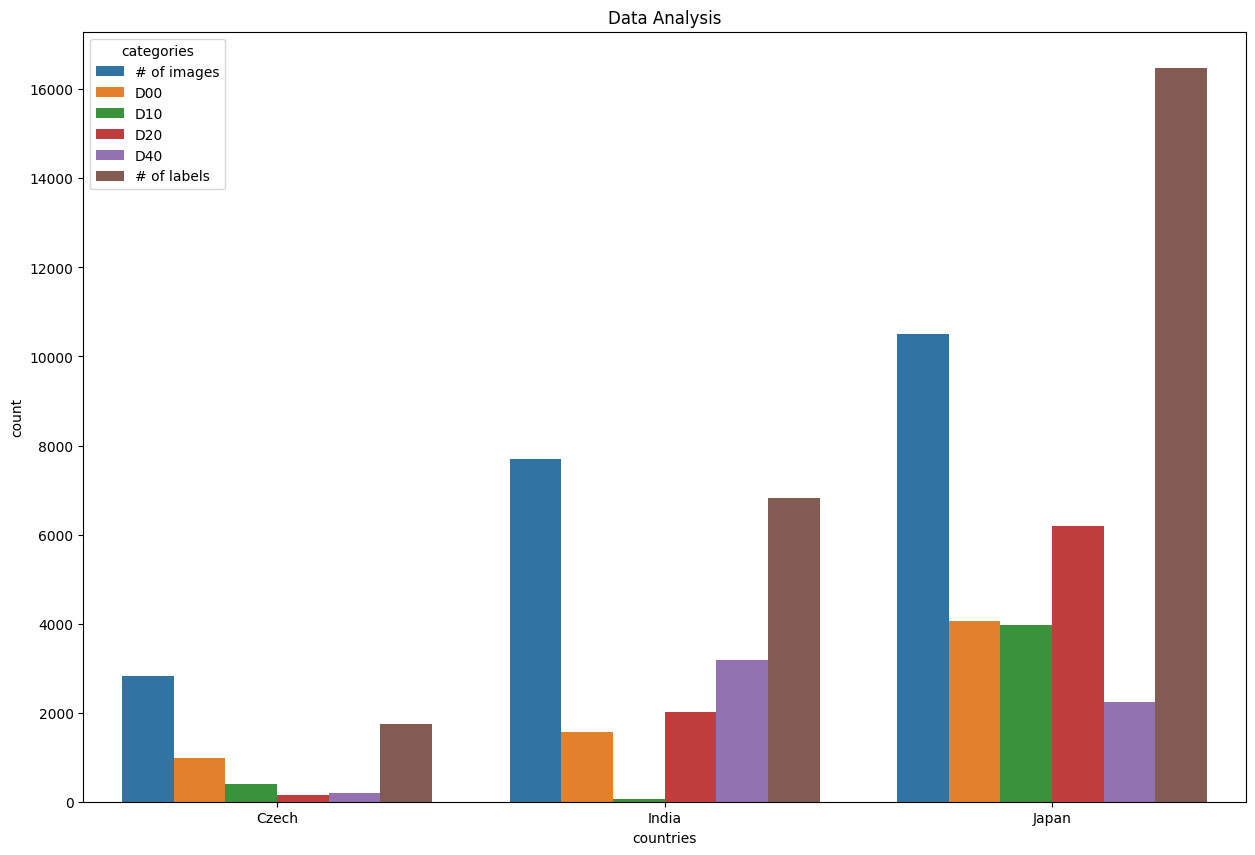

Data analysis of  Czech
    categories  count
0  # of images   2829
1          D00    988
2          D10    399
3          D20    161
4          D40    197
5  # of labels   1745
****************************************************************************************************
Data analysis of  India
     categories  count
6   # of images   7706
7           D00   1555
8           D10     68
9           D20   2021
10          D40   3187
11  # of labels   6831
****************************************************************************************************
Data analysis of  Japan
     categories  count
12  # of images  10506
13          D00   4049
14          D10   3979
15          D20   6199
16          D40   2243
17  # of labels  16470
****************************************************************************************************


In [8]:
data_analysis = pd.DataFrame({'countries':cont, 'count': count, 'categories':category})

fig = plt.figure(figsize = (15,10))

sns.barplot(x = 'countries', y = 'count', hue = 'categories', data = data_analysis)
plt.title('Data Analysis')
plt.show()

for i in countries:
    print('Data analysis of ',i)
    print(data_analysis[['categories', 'count']][data_analysis['countries'] == i])
    print('*'*100)

In [9]:
def draw_images(image_file, country):

    img = cv2.imread(base_path + country + '/images/' + image_file + '.jpg')
    
    infile_xml = open(base_path + country + '/annotations/xmls/' +image_file + '.xml')
    tree = ElementTree.parse(infile_xml)
    root = tree.getroot()
    
    for obj in root.iter('object'):
        cls_name = obj.find('name').text
        xmlbox = obj.find('bndbox')
        xmin = int(xmlbox.find('xmin').text)
        xmax = int(xmlbox.find('xmax').text)
        ymin = int(xmlbox.find('ymin').text)
        ymax = int(xmlbox.find('ymax').text)

        font = cv2.FONT_HERSHEY_SIMPLEX

        # put text
        cv2.putText(img,cls_name,(xmin,ymin-10),font,1,(0,255,0),2,cv2.LINE_AA)

        # draw bounding box
        cv2.rectangle(img, (xmin, ymin), (xmax, ymax), (0,255,0),3)
    return img

Images of Road Damages of  Czech


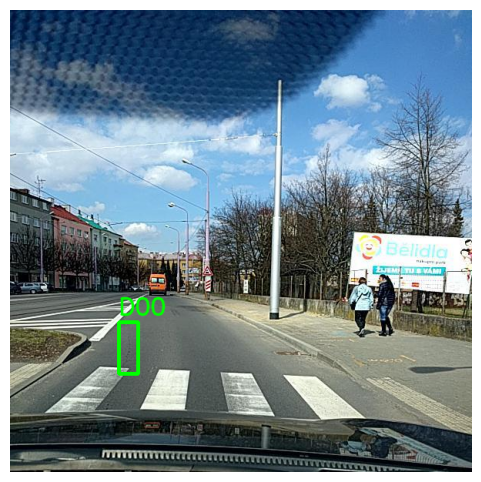

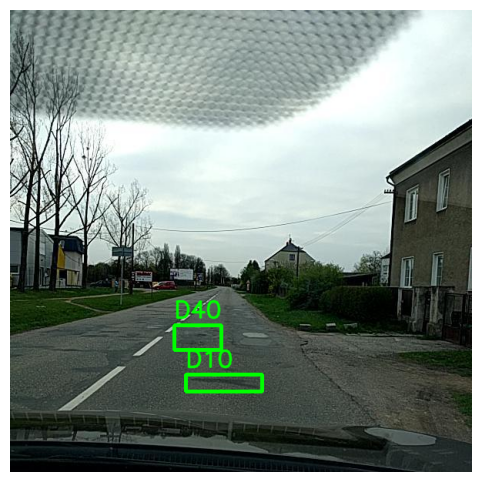

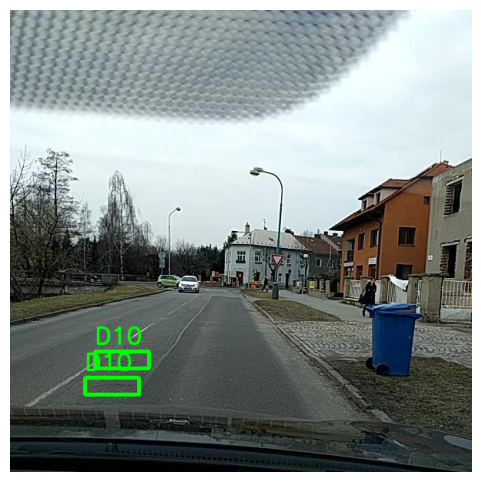

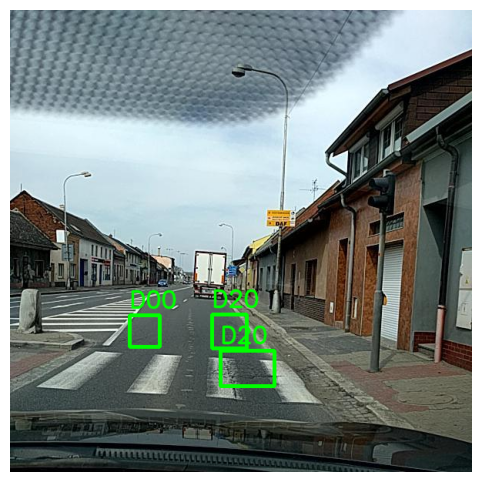

****************************************************************************************************
Images of Road Damages of  India


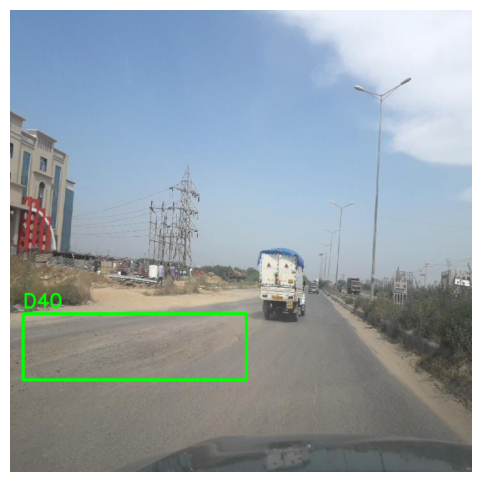

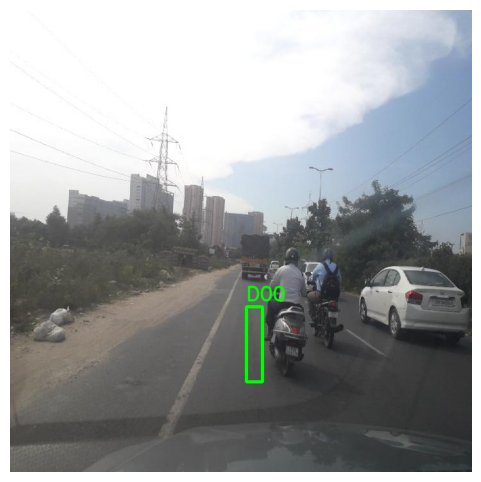

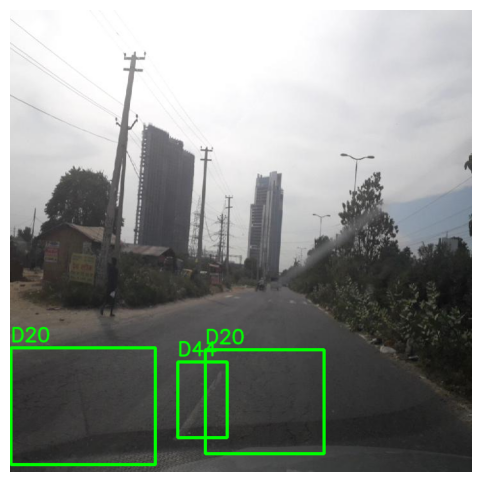

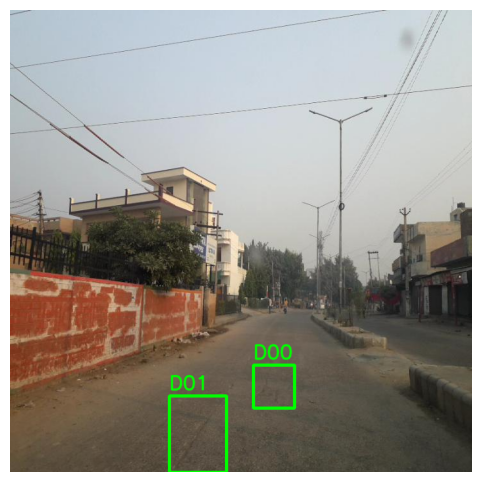

****************************************************************************************************
Images of Road Damages of  Japan


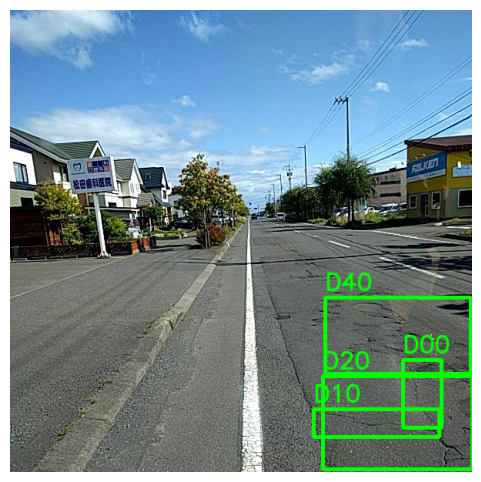

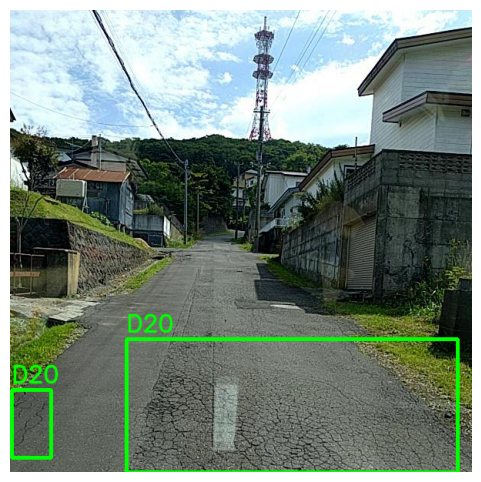

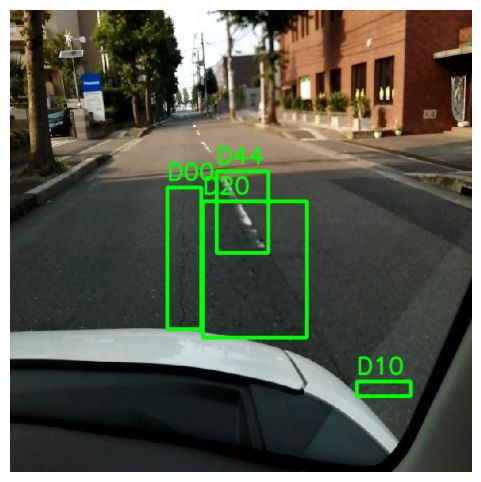

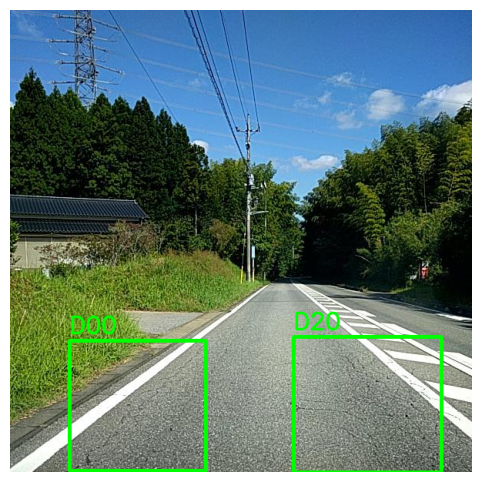

****************************************************************************************************


In [10]:
files = [['Czech_000006','Czech_000010','Czech_000020','Czech_000031'],['India_000005','India_000011','India_000014','India_000038'],
         ['Japan_000000', 'Japan_000003', 'Japan_000006', 'Japan_000011']]

for i in range(3):
    print('Images of Road Damages of ',countries[i])            
    for j in range(len(files[i])):
        fig = plt.figure(figsize = (6,6))
        img = draw_images(files[i][j], countries[i])
        plt.axis('off')
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        plt.show()
    print('*'*100)

Count of different sizes in overall dataset: [1379, 11821, 4931, 2671, 1789, 1228, 659, 137, 64, 8, 1, 0, 0]
Minimum size of a label: 0x1
Maximum size of a label: 704x492


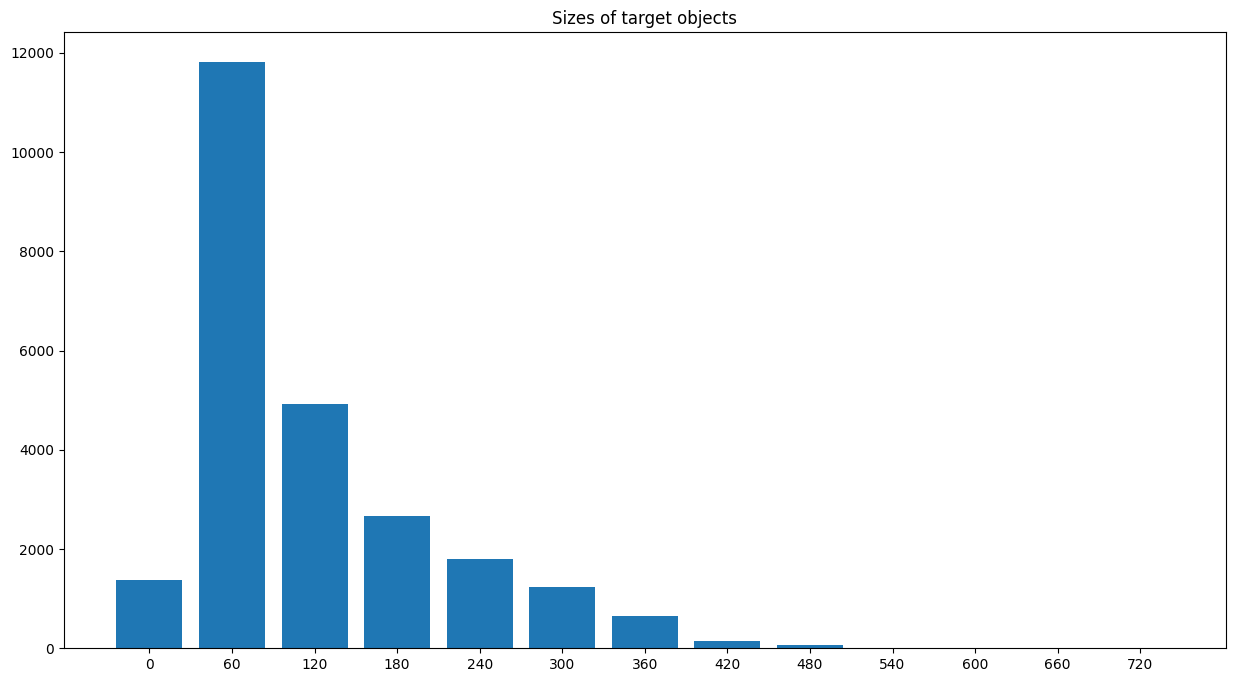

In [11]:
#getting sizes of all objects(target boxes)

sizes = []  #storing the size of each label
x = []
y =  []
object_size_num = [0 for i in range(13)]   #counting no of occureneces of that particular range in which the size belongs

for i in anot_files:
    
    infile_xml = open(i)
    tree = ElementTree.parse(infile_xml)
    root = tree.getroot()
    width = int(root.find('size')[0].text)
    if (root.find('object') != None) & (width < 1024): 
        for obj in root.iter('object'):
            cls_name = obj.find('name').text
            if cls_name in ['D00', 'D10', 'D20', 'D40']:
                xmin = int(obj.find('bndbox')[0].text)
                ymin = int(obj.find('bndbox')[1].text)
                xmax = int(obj.find('bndbox')[2].text)
                ymax = int(obj.find('bndbox')[3].text)
                l = xmax - xmin
                b = ymax - ymin
                obj_size = math.sqrt(l * b)
                sizes.append(obj_size)
                x.append(l)
                y.append(b)
                object_size_num[round(obj_size / 60)] += 1
    
print(f'Count of different sizes in overall dataset: {object_size_num}')

mi = sizes.index(min(sizes))
ma = sizes.index(max(sizes))

print(f'Minimum size of a label: {x[mi]}x{y[mi]}')
print(f'Maximum size of a label: {x[ma]}x{y[ma]}')

fig = plt.figure(figsize = (15,8))
plt.bar(list(map(str, range(0, 721, 60))), object_size_num)  
plt.title("Sizes of target objects")
plt.show()